In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch as th
import torchvision as tv
import torchvision.transforms as T

In [2]:


DISQUE_PATH = '/Volumes/Olivier/crapauduc/'
bb_csv = pd.read_csv("data/path_and_bounding_box.csv")


In [3]:
bb_csv['class'].value_counts()

feuille       1085
insect         270
triton         225
grenouille     201
souris         197
plastic         38
oiseau           3
animal           2
Name: class, dtype: int64

In [4]:
#get the triton lines
triton_paths = bb_csv[bb_csv['class'] == 'triton']

In [5]:
#get the first line talking about a triton
img_triton_1 = triton_paths.iloc[0]

bounding_box = img_triton_1
#get the values about the bounding box
x1,y1,w,h = bounding_box['top_left_x'],bounding_box['top_left_y'],bounding_box['w'],bounding_box['h']
#create a tansor representing a bounding box 
#note that the bbox is (top left x, top left y), (bottom right x, bottom right y)
bbox_t = th.tensor([x1, y1, x1 +w, y1+h]).reshape(-1,4)

In [6]:
img_triton_1

class                                             triton
top_left_x                                          1295
top_left_y                                           382
w                                                     99
h                                                    183
img_size_x                                          1920
img_size_y                                          1080
name                             2017-03-23T04:55:21.jpg
date                                 2017-03-23 04:55:21
takes                                               5532
path          camera_04_unnested/2017-03-23T04_55_21.jpg
Name: 8, dtype: object

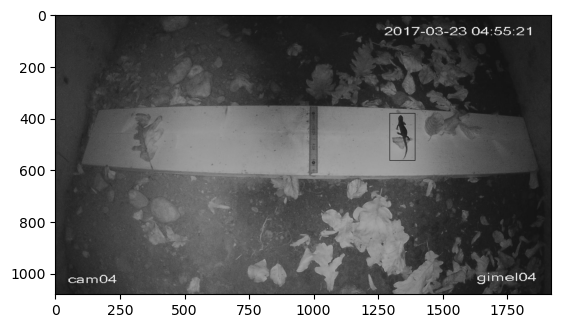

In [7]:
img = tv.io.read_image(DISQUE_PATH+img_triton_1['path'])
img = tv.utils.draw_bounding_boxes(img, bbox_t, width=2)
img = T.ToPILImage()(img.to('cpu'))
plt.imshow(img)
